# SMOTE(Syntetic Minority Oversampling Technique)

previously we had learned Upsampling method to handle the impalance datasets. But that method has some drawbacks.

they are :-
    1. They new data ponits are created by duplicating the old ones from same data.
    2. By that process we don't get new data points and variance calculated for same points so data will not spread proper and data points are also plotted at same location

So, that method is not effective in handling imbalance datasets.


## Definition :-
SMOTE involves in generating synthetic instances of the minority class by interpolating between existing instances.


In layman terms :-
SMOTE is a technique to create new data points using nearest points in same dataset.


You can refer first 6:10 minutes of below video for understanding:-

https://www.youtube.com/watch?v=U3X98xZ4_no



Now we can go deeper into the practical implementation of SMOTE and comparing it with upsampling

In [74]:
# This method will create data automatically for us we don't need to keep our efforts on creating datasets
from sklearn.datasets import make_classification
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# here also creating a new dataset similar to previous session with 9:1 ratio of categorical data.
X, y = make_classification(n_samples=1000, n_redundant=0 ,n_features=2, n_clusters_per_class=1, weights=[0.90],
                    random_state=12) # it'll return features as a array and target as another array

X, y


(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [75]:
df1 = pd.DataFrame(X, columns=["F1", "F2"])
df2 = pd.DataFrame(y, columns=["Tgt"])
final_df = pd.concat([df1, df2], axis=1)
display(final_df.Tgt.value_counts())
final_df.head()


0    900
1    100
Name: Tgt, dtype: int64

,F1,F2,Tgt
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


,F1,F2,Tgt
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


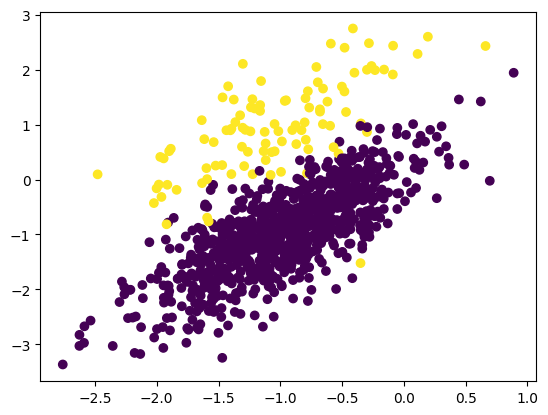

In [76]:
# sns.scatterplot(final_df[["F1", "F2"]])
display(final_df.head())
plt.scatter(final_df["F1"], final_df["F2"], c=final_df["Tgt"])

In [77]:
from imblearn.over_sampling import SMOTE


oversample = SMOTE()
X, y = oversample.fit_resample(final_df[["F1", "F2"]], final_df[["Tgt"]])

X.head(), y.head(), len(X), len(y)


(         F1        F2
 0 -0.762898 -0.706808
 1 -1.075436 -1.051162
 2 -0.610115 -0.909802
 3 -2.023284 -0.428945
 4 -0.812921 -1.316206,
    Tgt
 0    0
 1    0
 2    0
 3    1
 4    0,
 1800,
 1800)

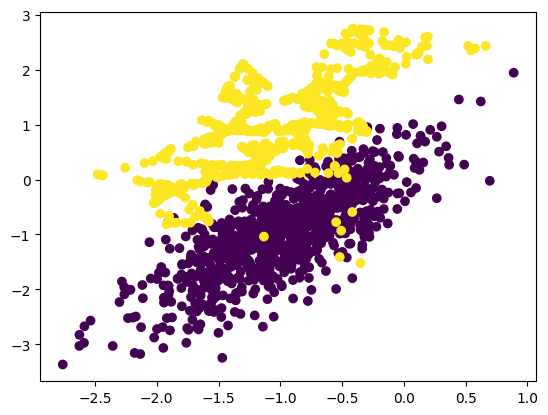

In [78]:
plt.scatter(X["F1"], X["F2"], c=y["Tgt"])